#This jupyter notebook is prepared by Daniel Cisneros


# Features
* enrollee_id : Unique ID for candidate
* city: City code
* city_ development _index : Developement index of the city (scaled)
* gender: Gender of candidate
* relevent_experience: Relevant experience of candidate
* enrolled_university: Type of University course enrolled if any
* education_level: Education level of candidate
* major_discipline :Education major discipline of candidate
* experience: Candidate total experience in years
* company_size: No of employees in current employer's company
* company_type : Type of current employer
* lastnewjob: Difference in years between previous job and current job
* training_hours: training hours completed
* state: State of the candidate
* city_development_matrix: An indicator of the city development
* target: 0 – Not looking for job change, 1 – Looking for a job change

---
---

1. import libraries: pandas, numpy, matplotlib (set %matplotlib inline), matplotlib’s pyplot, seaborn, missingno, scipy’s stats, sklearn (1 pt)
---

In [3]:
# Libraries

import pandas as pd
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno

2. import the data to a dataframe and show how many rows and columns does it have (1pt)
---

In [4]:
data = pd.read_csv("hrdata.csv")


print("Number of rows: ", len(data))

print("Number of columns: ",len(data.columns), "\n")
print(data.columns)
print("\nTotal matrix: ", data.shape)


Number of rows:  21287
Number of columns:  18 

Index(['Unnamed: 0', 'rec_num', 'enrollee_id', 'city',
       'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours', 'target', 'state', 'city_development_matrics'],
      dtype='object')

Total matrix:  (21287, 18)


3. call the describe method of dataframe to see some summary statistics of the numerical columns. (1 pt)
---

In [5]:
data.describe()

,Unnamed: 0,rec_num,enrollee_id,city_development_index,training_hours,target,city_development_matrics
count,21287.000000,21287.000000,21287.000000,21287.000000,21287.000000,19158.000000,21287.000000
mean,10643.000000,10644.000000,16873.983652,0.828462,65.328510,0.249348,8.284615
std,6145.171926,6145.171926,9612.131237,0.123537,60.075201,0.432647,1.235365
min,0.000000,1.000000,1.000000,0.448000,1.000000,0.000000,4.480000
25%,5321.500000,5322.500000,8554.500000,0.739000,23.000000,0.000000,7.390000
50%,10643.000000,10644.000000,16967.000000,0.903000,47.000000,0.000000,9.030000
75%,15964.500000,15965.500000,25161.500000,0.920000,88.000000,0.000000,9.200000
max,21286.000000,21287.000000,33380.000000,0.949000,336.000000,1.000000,9.490000


* Explain in words if you find any column’s statistics interesting and good to know (1 pt)

I find summary statistics of the numerical columns interesting to know because I am able to see statistical references as the mean, standar deviation, min, and max values. 

I can also see there is a column which contains no name. 

4. Show the top 5 rows and last 5 rows of the data frame (1 pt)
---

In [6]:
data.head(5)

,Unnamed: 0,rec_num,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,state,city_development_matrics
0,0,1,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,CA,9.20
1,1,2,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,CA,7.76
2,2,3,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,CA,6.24
3,3,4,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,CA,7.89
4,4,5,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0,CA,7.67


In [7]:
data.tail(5)

,Unnamed: 0,rec_num,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,state,city_development_matrics
21282,21282,21283,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15,NaN,CA,9.20
21283,21283,21284,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30,NaN,CA,8.97
21284,21284,21285,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18,NaN,CA,8.87
21285,21285,21286,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84,NaN,CA,8.04
21286,21286,21287,12215,city_102,0.804,Male,Has relevent experience,no_enrollment,Masters,STEM,15,10000+,Pvt Ltd,2,11,NaN,CA,8.04


5. List all the numerical columns (1 pt)
---

In [8]:
numerical_features = data.select_dtypes(include = [np.number])
numerical_features.columns

Index(['Unnamed: 0', 'rec_num', 'enrollee_id', 'city_development_index',
       'training_hours', 'target', 'city_development_matrics'],
      dtype='object')

6. List all the categorial columns (1 pt)
---

In [9]:
categorical_features = data.select_dtypes(include= [np.object])
categorical_features.columns


Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job', 'state'],
      dtype='object')

7. Examine missing values: (2 + 2 + 2 + 5 = 11 pt)

---



* 1. Show a list with column wise count of missing values and display the list in count wise descending order. 

In [10]:
nulls = data.isnull().sum().to_frame("nulls")
nulls.sort_values("nulls", inplace = True, ascending = False)
nulls

,nulls
company_type,6774
company_size,6560
gender,5016
major_discipline,3125
target,2129
education_level,512
last_new_job,463
enrolled_university,417
experience,70
state,0


* 2. Show a list with column wise percentage of missing values and display the list in percentage wise descending order

In [11]:
percentage = data.isnull().mean()*100
percentage = percentage.to_frame("nulls")
percentage.sort_values("nulls", inplace = True, ascending = False)

percentage

,nulls
company_type,31.822239
company_size,30.816931
gender,23.563677
major_discipline,14.680321
target,10.001409
education_level,2.405224
last_new_job,2.175036
enrolled_university,1.958942
experience,0.328839
state,0.000000


* 3. Display a bar plot to visualize only the columns with missing values and their count. The plot should display from less missing value columns in the left and then more missing value columns to the right side of the plot. 

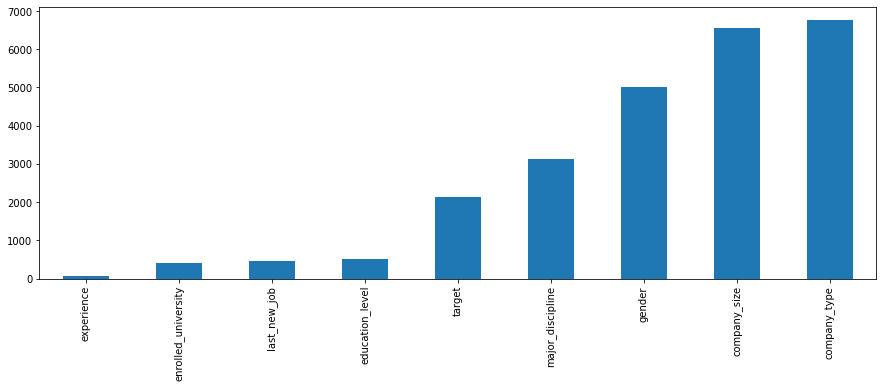

In [12]:
missing = data.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace = True)
plt.figure(figsize= (15,5))
missing.plot.bar()


* 4. Use missingno’s bar plot, matrix plot with 200 sample, and heatmap

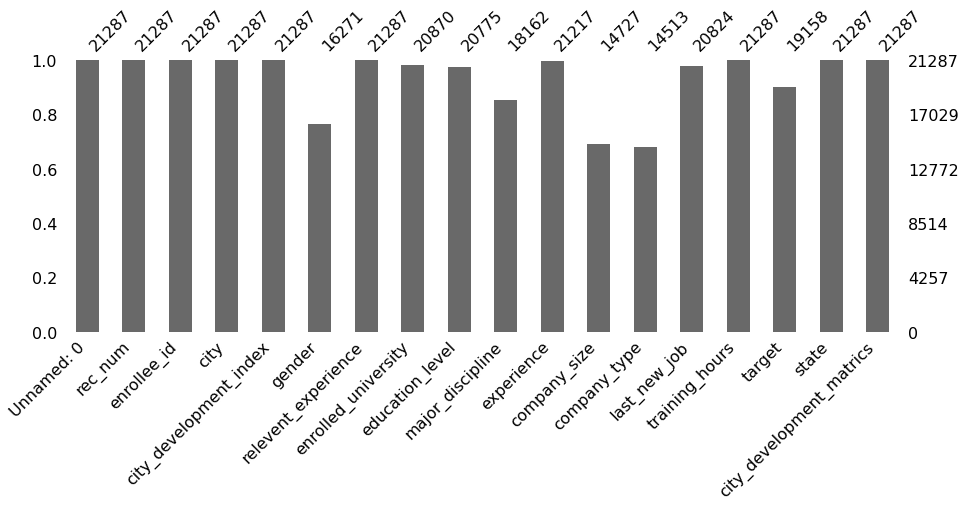

In [13]:
msno.bar(data, figsize=(15,5))


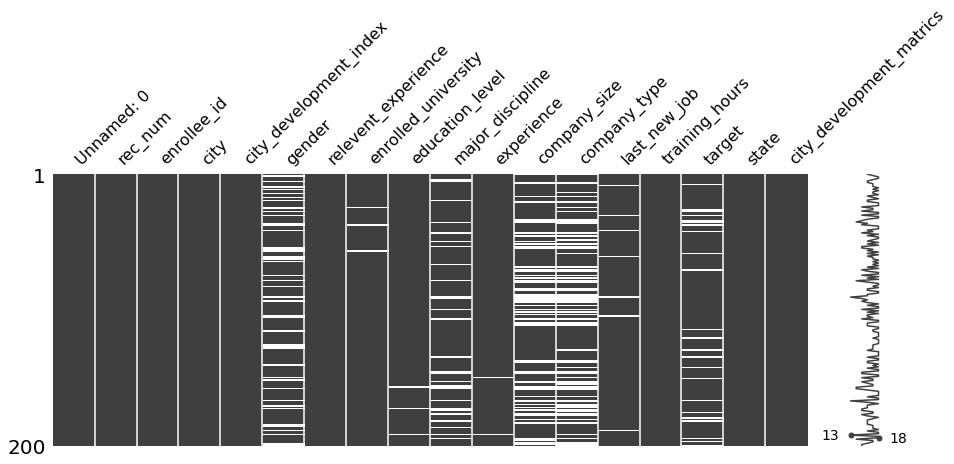

In [14]:
msno.matrix(data.sample(200), figsize=(15,5))

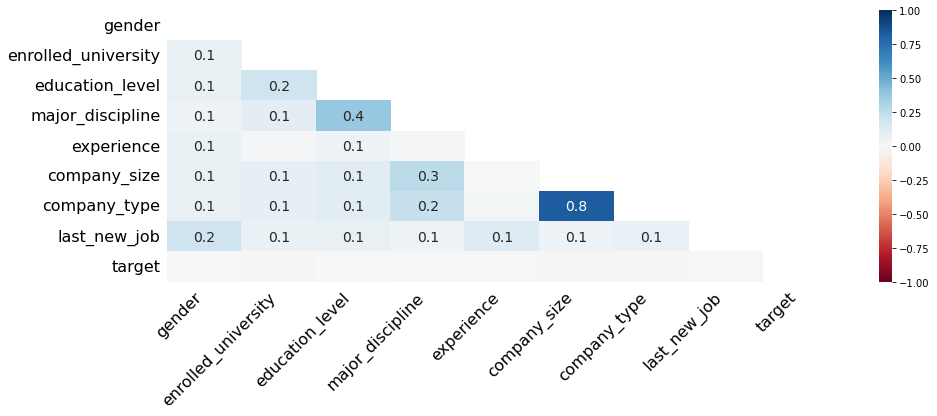

In [15]:
msno.heatmap(data, figsize=(15,5))

**Interpret any interesting information you found in the heatmap and any one plot:** 

In the heatmap we can see that the majority of the data as almost no correlation with each other besides the company type with the company size. 

The matrix plot shows good information for the missing values, we can see that the gender company size, target, and state seems to have the most missing values. 

The bar plot is also helpfull to see the the quantity of missing values.



8. Understanding Categorical attributes (this part may require you to make 20+ plots ) [26 pts]
---

* Use seaborn bar plot for the categorical feature to see different values and count

* Use seaborn countplot for the categorical feature against the values of the target

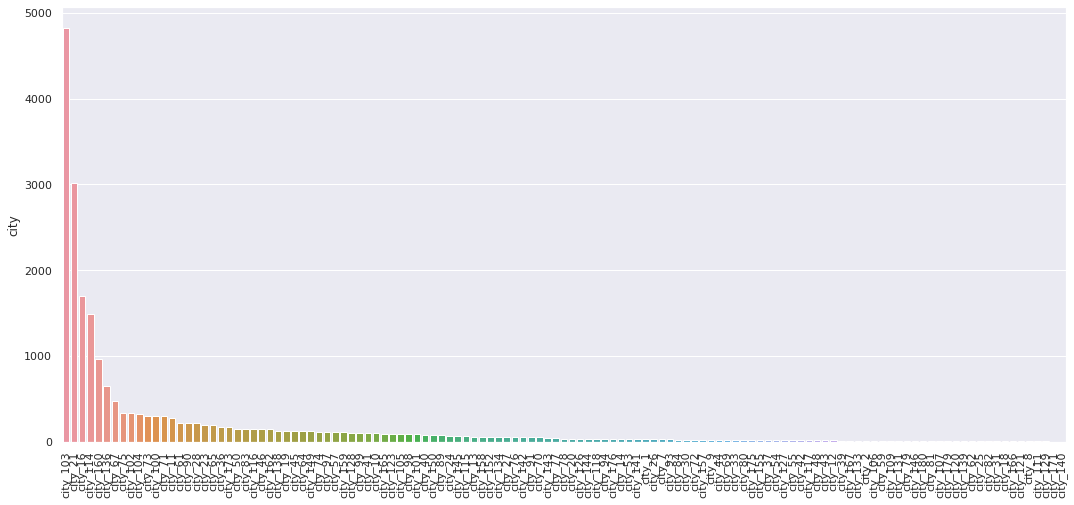

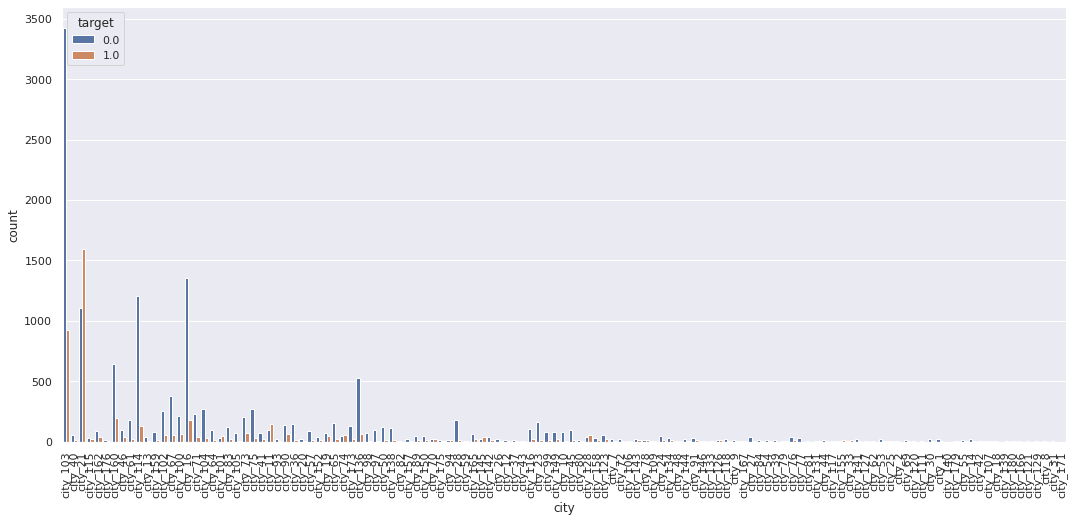

In [16]:
sns.set(rc = {'figure.figsize':(18,8)})

city = data["city"].value_counts()
sns.barplot(x = city.index, y = city, data = data)
plt.xticks(rotation = 90)
plt.show()

sns.countplot(x = "city", data = data, hue = "target")
plt.xticks(rotation=90)
plt.show()

Male      14681
Female     1375
Other       215
Name: gender, dtype: int64


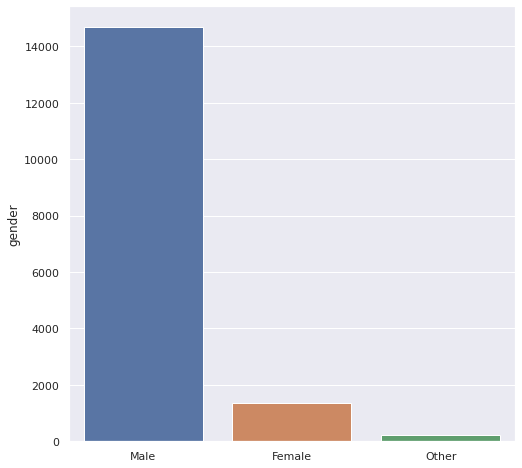

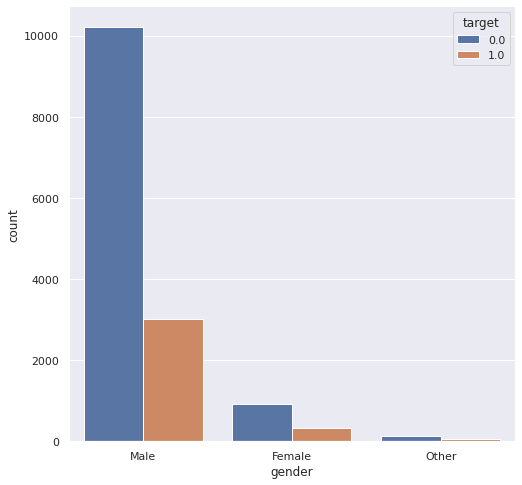

In [17]:
sns.set(rc = {'figure.figsize':(8,8)})
print(categorical_features["gender"].value_counts())

gender = data["gender"].value_counts()
sns.barplot(x = gender.index, y = gender, data = data)
plt.show()

sns.countplot(x = "gender", data = data, hue = "target")
plt.show()

Has relevent experience    15316
No relevent experience      5971
Name: relevent_experience, dtype: int64


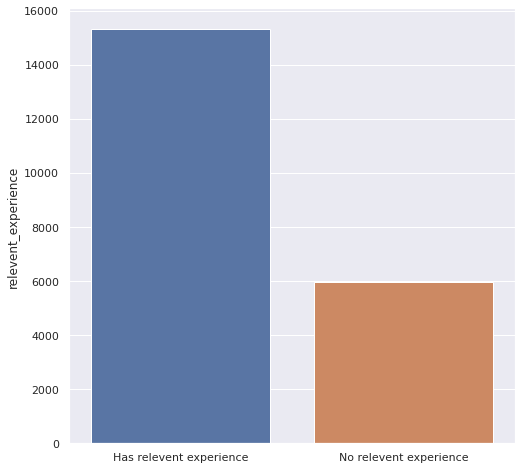

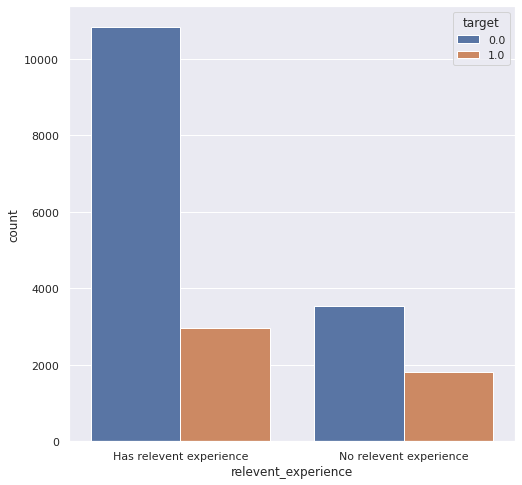

In [18]:
sns.set(rc = {'figure.figsize':(8,8)})
print(categorical_features["relevent_experience"].value_counts())

relevant_experience = data["relevent_experience"].value_counts()
sns.barplot(x = relevant_experience.index, y = relevant_experience, data = data)
plt.show()

sns.countplot(x ="relevent_experience", data = data, hue = "target")
plt.show()

no_enrollment       15336
Full time course     4192
Part time course     1342
Name: enrolled_university, dtype: int64


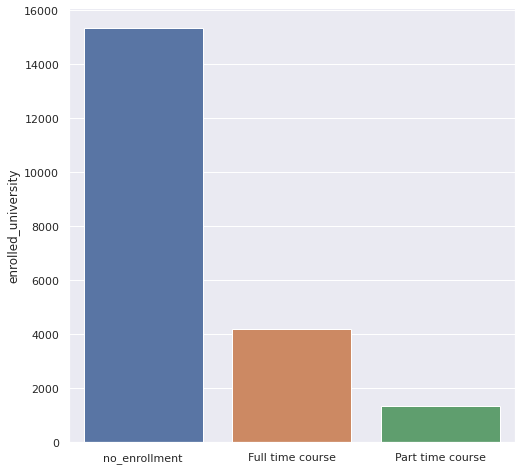

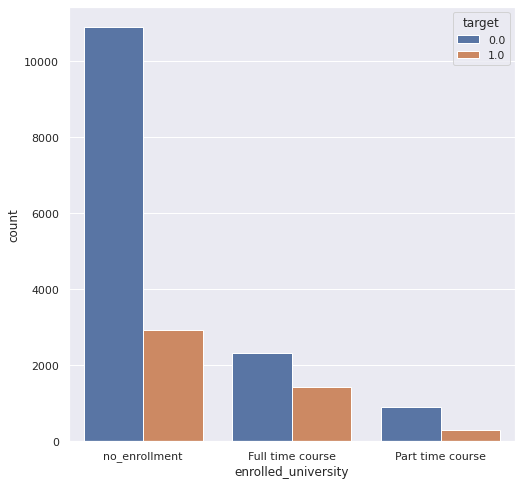

In [19]:
print(categorical_features["enrolled_university"].value_counts())

enrolled = data["enrolled_university"].value_counts()
sns.barplot(x = enrolled.index, y = enrolled, data = data)
plt.show()

sns.countplot(x = "enrolled_university", data = data, hue = "target")

plt.show()

Graduate          12867
Masters            4857
High School        2239
Phd                 468
Primary School      344
Name: education_level, dtype: int64


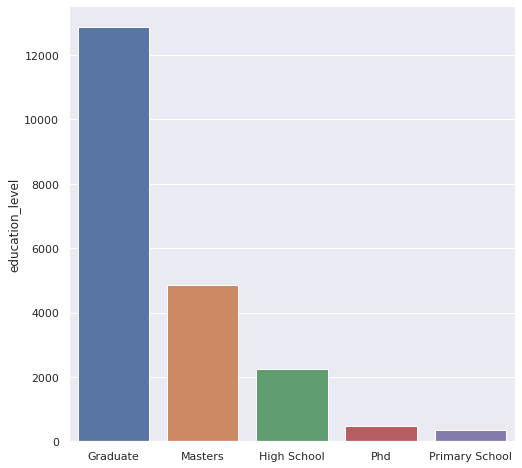

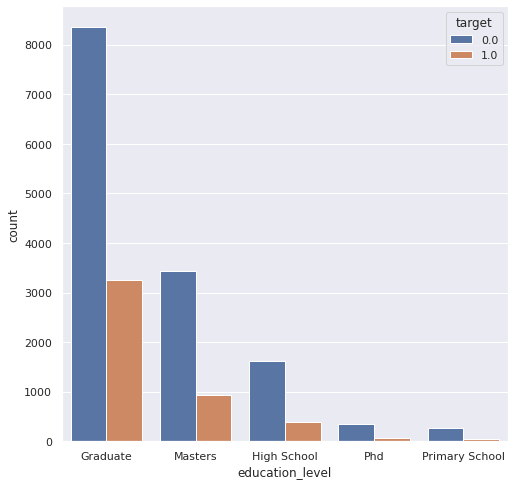

In [20]:
print(categorical_features["education_level"].value_counts())

education = data["education_level"].value_counts()
sns.barplot(x = education.index, y = education, data = data)
plt.show()

sns.countplot(x = "education_level", data = data, hue = "target")

plt.show()

STEM               16113
Humanities           749
Other                421
Business Degree      364
Arts                 270
No Major             245
Name: major_discipline, dtype: int64


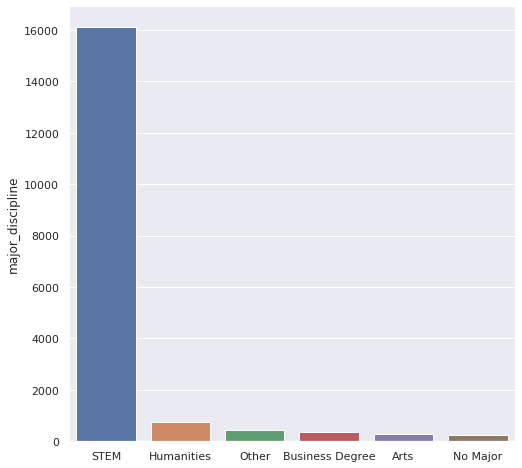

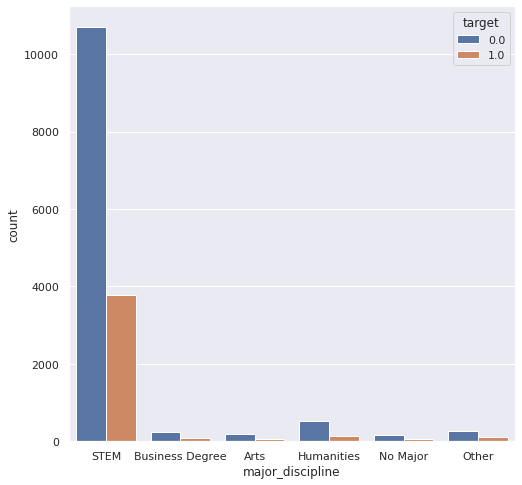

In [21]:
print(categorical_features["major_discipline"].value_counts())

discipline = data["major_discipline"].value_counts()
sns.barplot(x = discipline.index,y = discipline, data = data)
plt.show()

sns.countplot(x = "major_discipline", data = data, hue = "target")

plt.show()

>20    3669
5      1593
4      1548
3      1508
6      1346
2      1255
7      1144
9      1093
10     1081
8       884
11      750
15      745
14      641
1       605
<1      596
16      576
12      546
13      453
17      378
19      333
18      306
20      167
Name: experience, dtype: int64


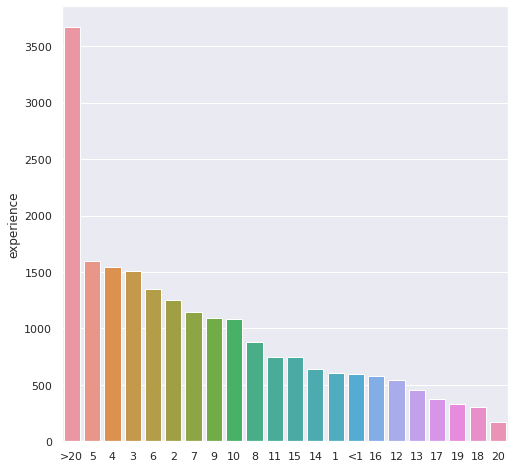

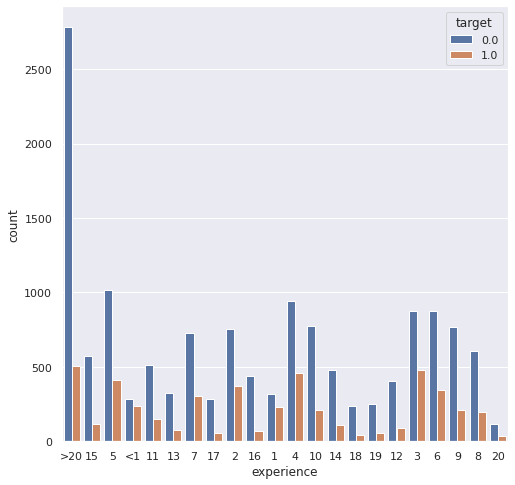

In [22]:
print(categorical_features["experience"].value_counts())

experience = data["experience"].value_counts()
sns.barplot(x = experience.index, y = experience, data = data)
plt.show()

sns.countplot(x = "experience", data = data, hue = "target")

plt.show()

50-99        3421
100-500      2889
10000+       2236
10/49        1643
<10          1471
1000-4999    1471
500-999       965
5000-9999     631
Name: company_size, dtype: int64


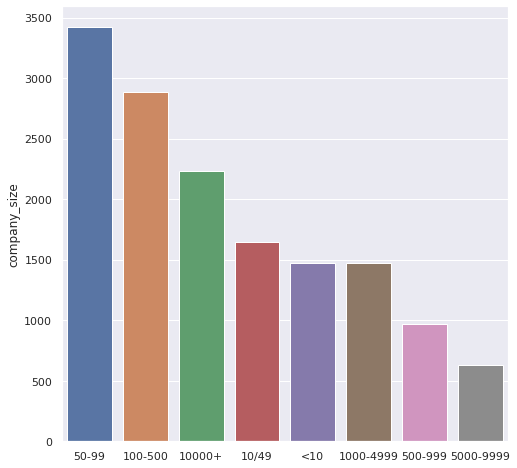

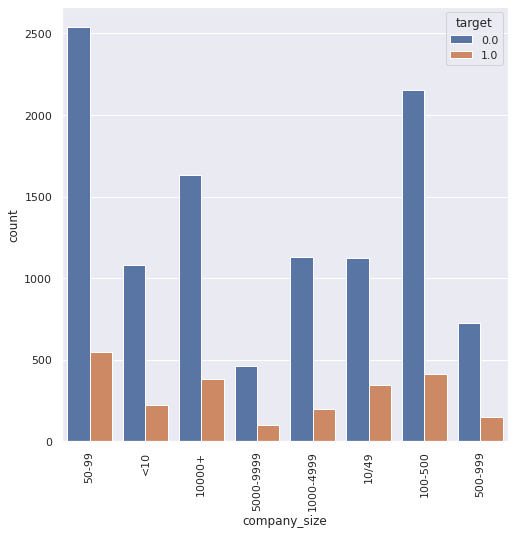

In [23]:
print(categorical_features["company_size"].value_counts())

comp_size = data["company_size"].value_counts()
sns.barplot(x = comp_size.index, y = comp_size, data = data)
plt.show()

sns.countplot(x = "company_size", data = data, hue = "target")
plt.xticks(rotation = 90)
plt.show()

Pvt Ltd                10958
Funded Startup          1098
Public Sector           1082
Early Stage Startup      668
NGO                      574
Other                    133
Name: company_type, dtype: int64


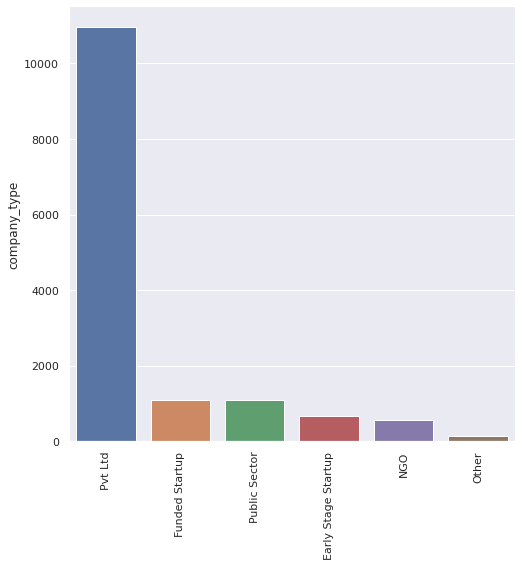

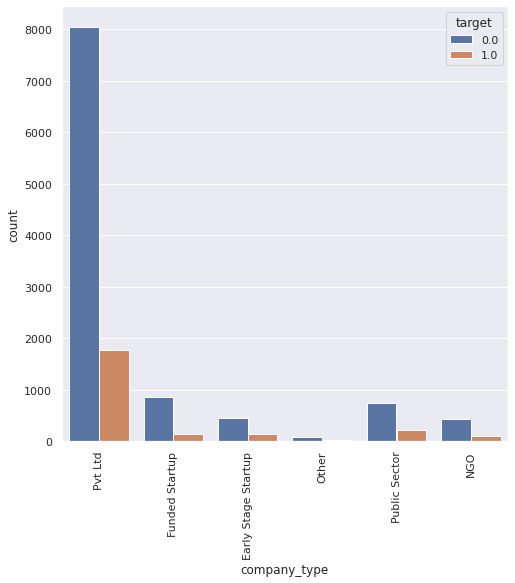

In [24]:
print(categorical_features["company_type"].value_counts())

comp_type = data["company_type"].value_counts()
sns.barplot(x = comp_type.index, y = comp_type, data = data)
plt.xticks(rotation = 90)
plt.show()

sns.countplot(x = "company_type", data = data, hue = "target")
plt.xticks(rotation = 90)
plt.show()

1        8924
>4       3643
2        3242
never    2710
3        1157
4        1148
Name: last_new_job, dtype: int64


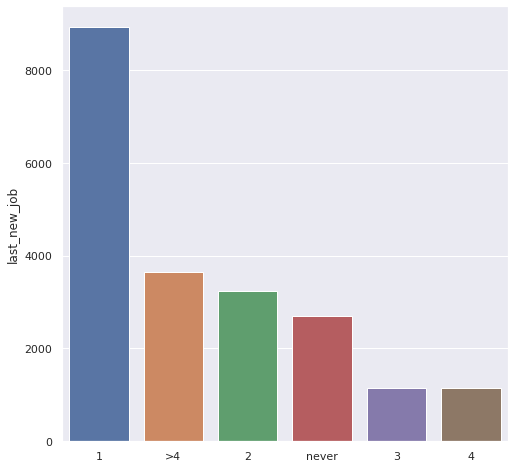

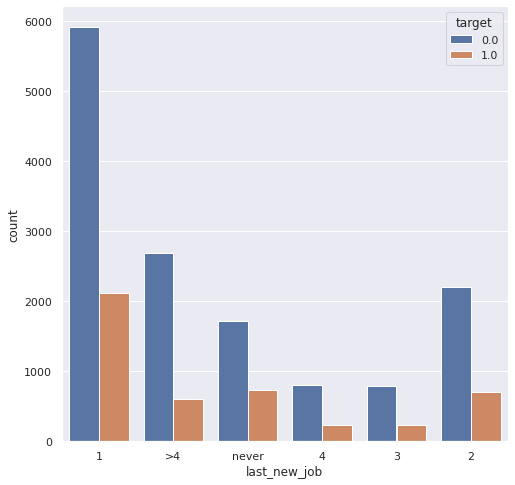

In [25]:
print(categorical_features["last_new_job"].value_counts())

last_job = data["last_new_job"].value_counts()
sns.barplot(x = last_job.index, y = last_job, data = data)
plt.show()

sns.countplot(x = "last_new_job", data = data, hue = "target")

plt.show()

CA    21287
Name: state, dtype: int64


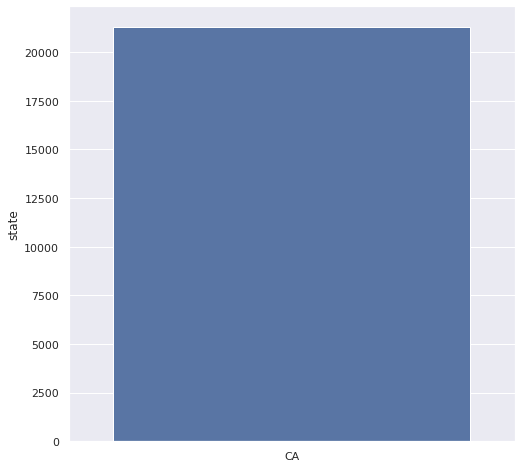

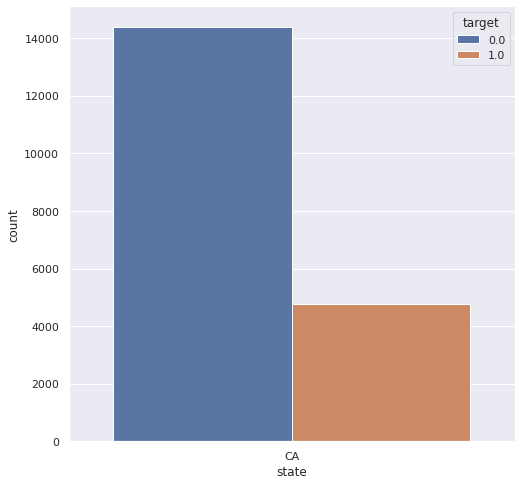

In [26]:
print(categorical_features["state"].value_counts())

state = data["state"].value_counts()
sns.barplot(x = state.index, y = state, data = data)
plt.show()

sns.countplot(x = "state", data = data, hue = "target")

plt.show()

Interpret any interesting information and any information that might help you to make any decision on combining, removing, or adding features based on that, or any resampling maybe needed.

Is probably good to combine the experience and the relevant of experience. Try to remove the state feature since all condidates seems to be from CA.

9. Understanding Numerical attributes (16 pts)
---

* Plot their distributions using histogram  (removed the group by word)
* Plot the distribution using seaborn distplot

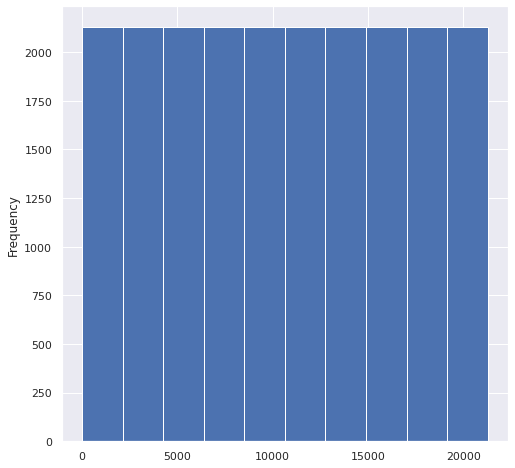

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

count    21287.000000
mean     10643.000000
std       6145.171926
min          0.000000
25%       5321.500000
50%      10643.000000
75%      15964.500000
max      21286.000000
Name: Unnamed: 0, dtype: float64

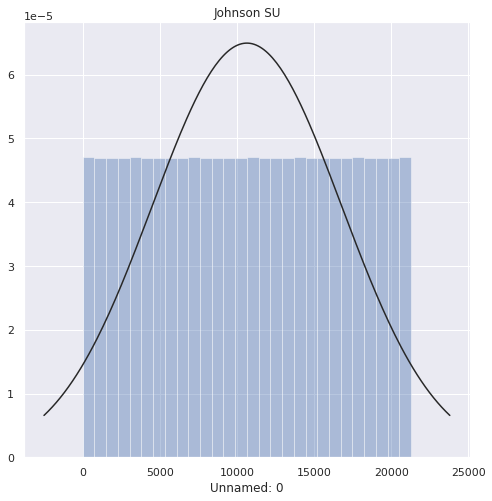

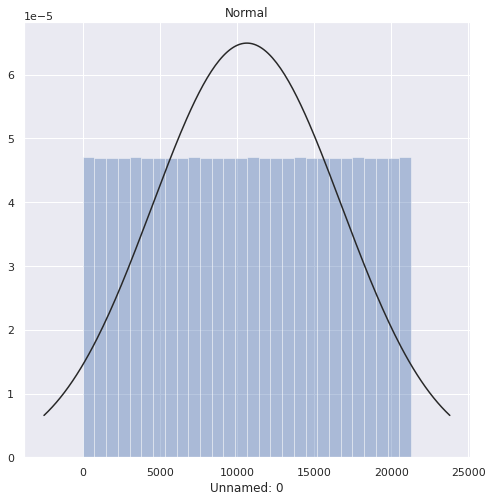

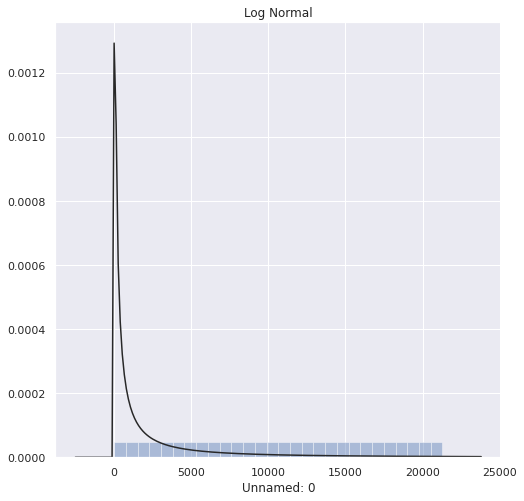

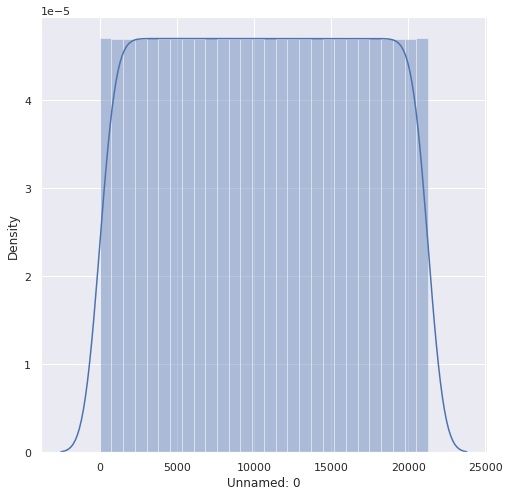

In [27]:
data["Unnamed: 0"].astype(int).plot.hist()
plt.show()

y = data["Unnamed: 0"]
plt.figure(1); plt.title("Johnson SU")
sns.distplot(y, kde= False, fit=st.johnsonsu)

plt.figure(2); plt.title("Normal")
sns.distplot(y, kde= False, fit=st.norm)

plt.figure(3); plt.title("Log Normal")
sns.distplot(y, kde= False, fit=st.lognorm)

plt.figure(4)
sns.distplot(y)
y.describe()

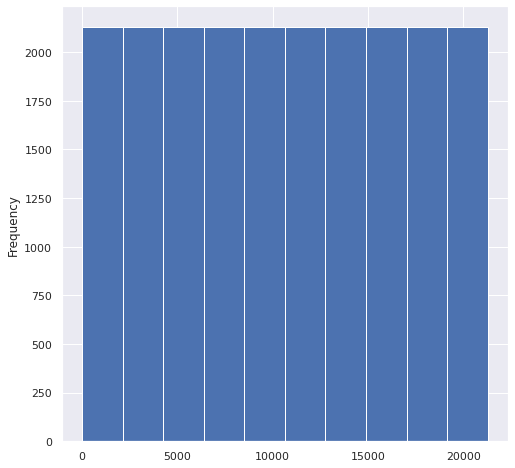

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

count    21287.000000
mean     10644.000000
std       6145.171926
min          1.000000
25%       5322.500000
50%      10644.000000
75%      15965.500000
max      21287.000000
Name: rec_num, dtype: float64

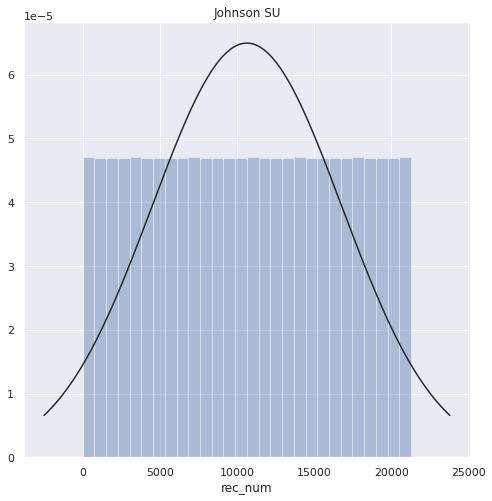

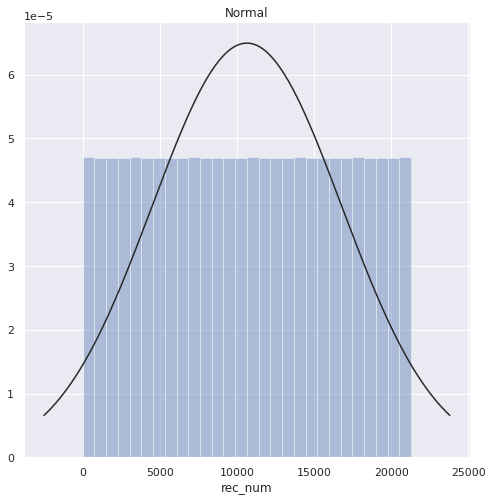

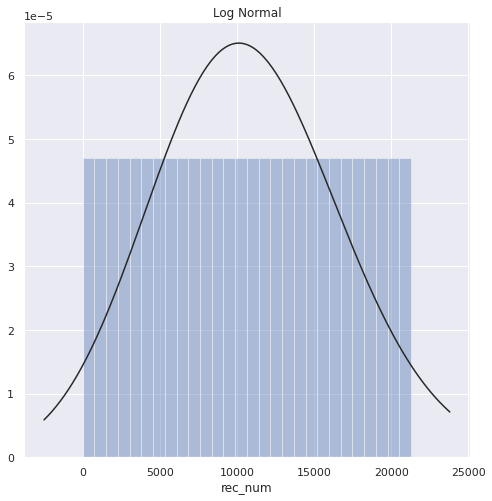

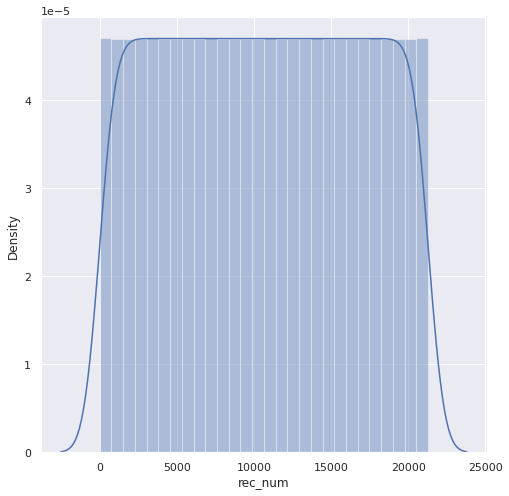

In [28]:
data["rec_num"].astype(int).plot.hist()
plt.show()

rec_num = data["rec_num"]
plt.figure(1); plt.title("Johnson SU")
sns.distplot(rec_num, kde= False, fit=st.johnsonsu)

plt.figure(2); plt.title("Normal")
sns.distplot(rec_num, kde= False, fit=st.norm)

plt.figure(3); plt.title("Log Normal")
sns.distplot(rec_num, kde= False, fit=st.lognorm)

plt.figure(4)
sns.distplot(rec_num)
rec_num.describe()

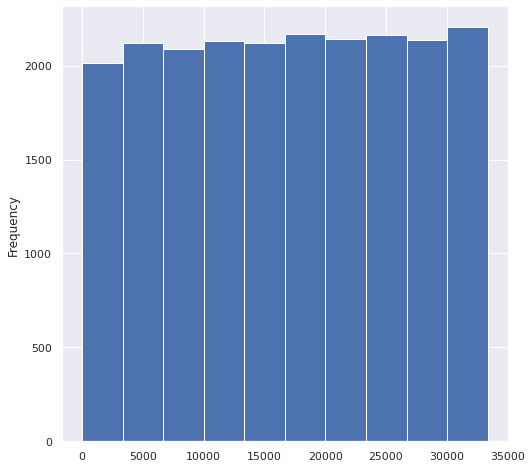

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

count    21287.000000
mean     16873.983652
std       9612.131237
min          1.000000
25%       8554.500000
50%      16967.000000
75%      25161.500000
max      33380.000000
Name: enrollee_id, dtype: float64

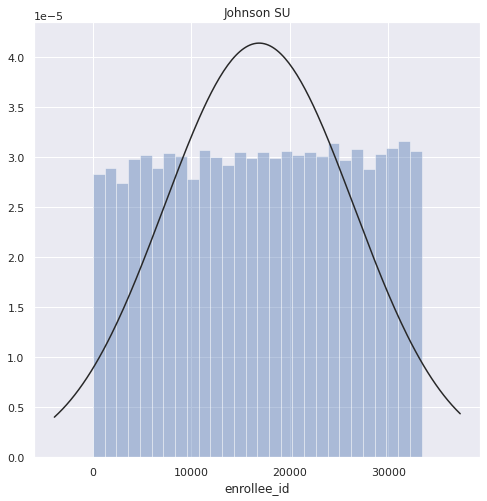

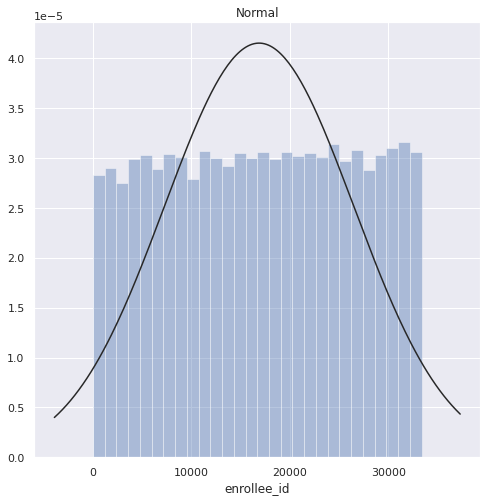

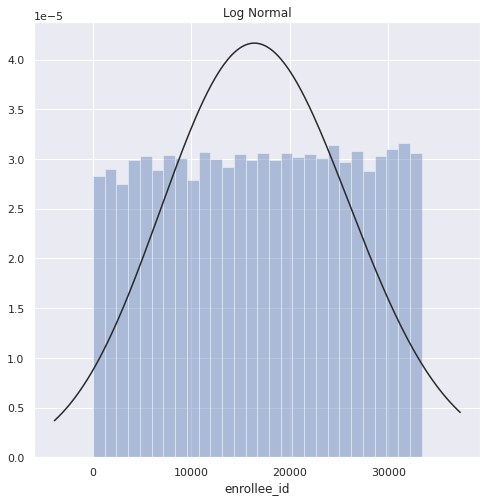

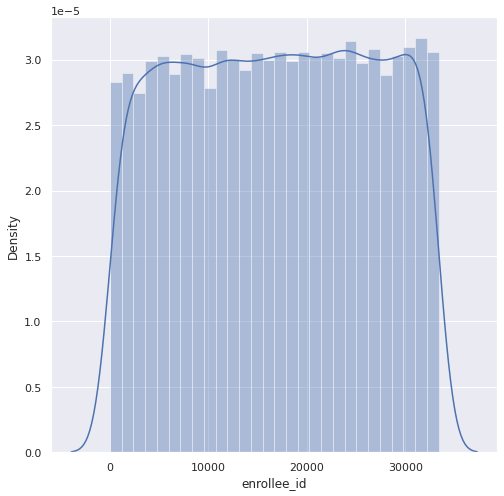

In [29]:
data["enrollee_id"].astype(int).plot.hist()
plt.show()

y = data["enrollee_id"]
plt.figure(1); plt.title("Johnson SU")
sns.distplot(y, kde= False, fit=st.johnsonsu)

plt.figure(2); plt.title("Normal")
sns.distplot(y, kde= False, fit=st.norm)

plt.figure(3); plt.title("Log Normal")
sns.distplot(y, kde= False, fit=st.lognorm)

plt.figure(4)
sns.distplot(y)
y.describe()

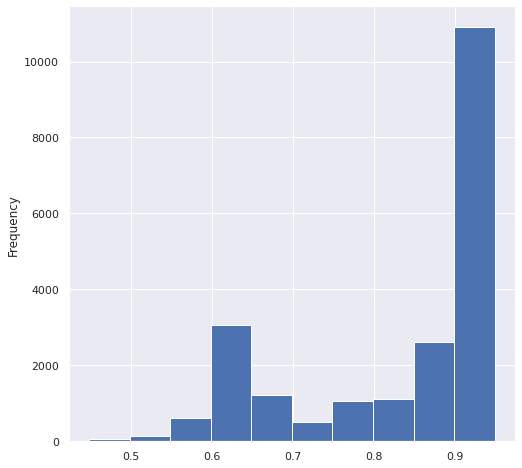

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:4018: RuntimeWarning: divide by zero encountered in log
  trm = _norm_pdf(a + b * np.log(x + np.sqrt(x2+1)))
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:1702: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for

count    21287.000000
mean         0.828462
std          0.123537
min          0.448000
25%          0.739000
50%          0.903000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64

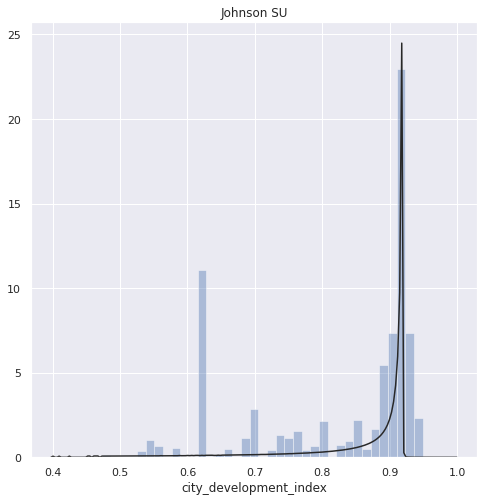

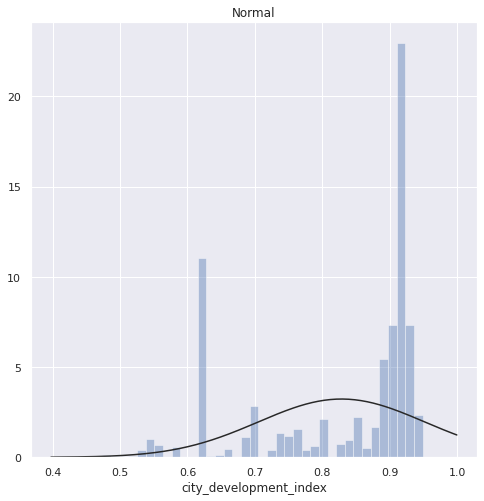

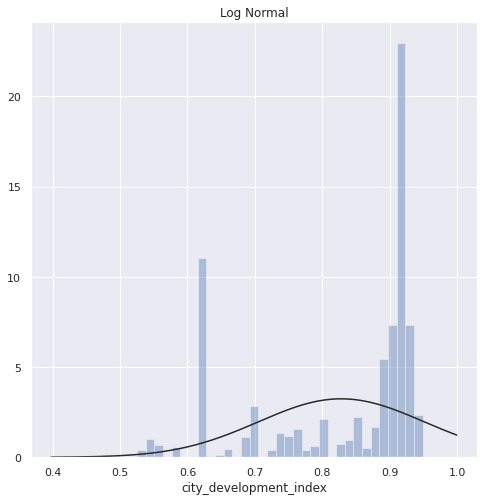

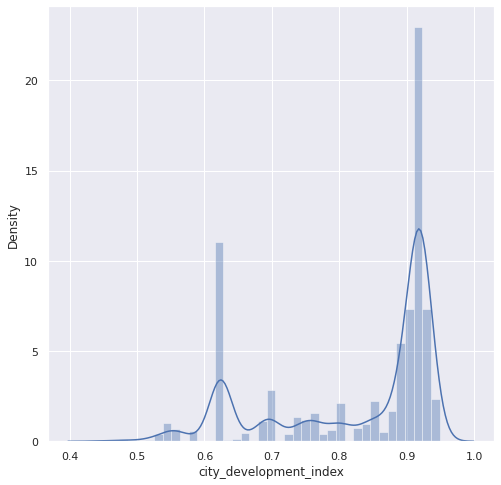

In [30]:
data["city_development_index"].astype(float).plot.hist()
plt.show()

y = data["city_development_index"]
plt.figure(1); plt.title("Johnson SU")
sns.distplot(y, kde= False, fit=st.johnsonsu)

plt.figure(2); plt.title("Normal")
sns.distplot(y, kde= False, fit=st.norm)

plt.figure(3); plt.title("Log Normal")
sns.distplot(y, kde= False, fit=st.lognorm)

plt.figure(4)
sns.distplot(y)
y.describe()

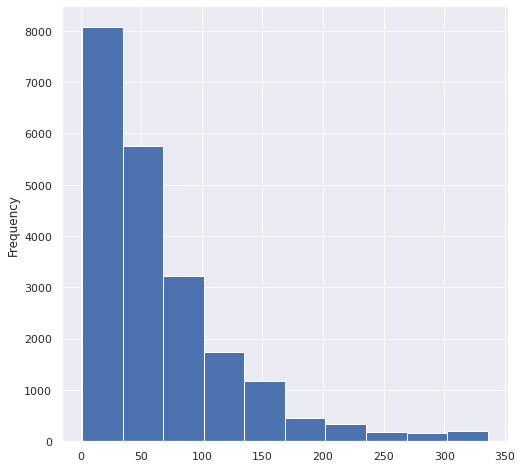

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

count    21287.000000
mean        65.328510
std         60.075201
min          1.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        336.000000
Name: training_hours, dtype: float64

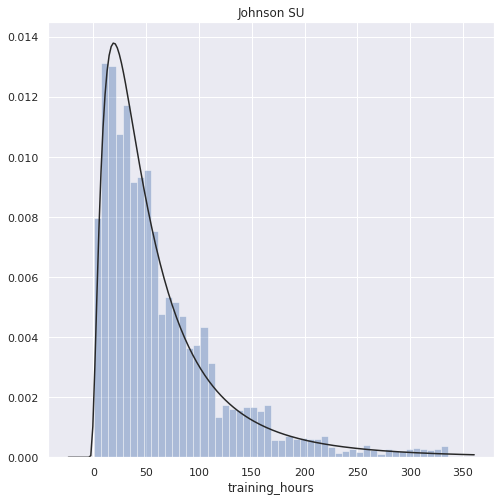

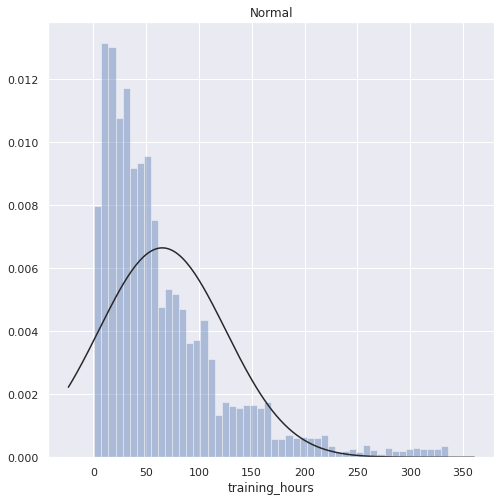

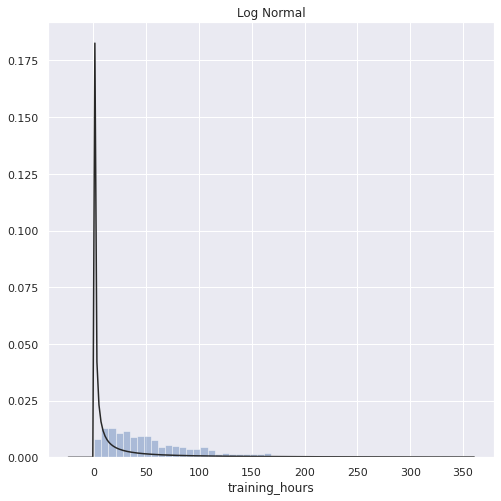

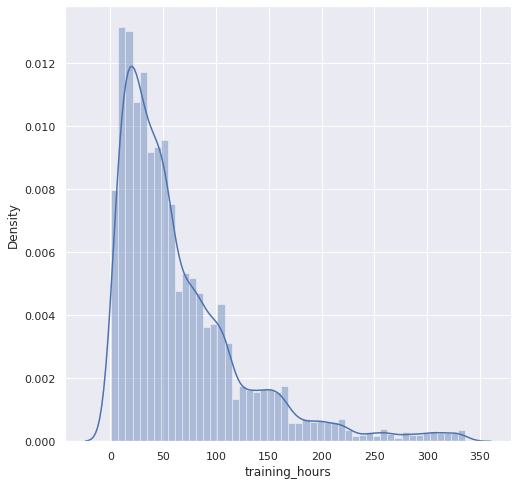

In [31]:
data["training_hours"].astype(float).plot.hist()
plt.show()

y = data["training_hours"]
plt.figure(1); plt.title("Johnson SU")
sns.distplot(y, kde= False, fit=st.johnsonsu)

plt.figure(2); plt.title("Normal")
sns.distplot(y, kde= False, fit=st.norm)

plt.figure(3); plt.title("Log Normal")
sns.distplot(y, kde= False, fit=st.lognorm)

plt.figure(4)
sns.distplot(y)
y.describe()

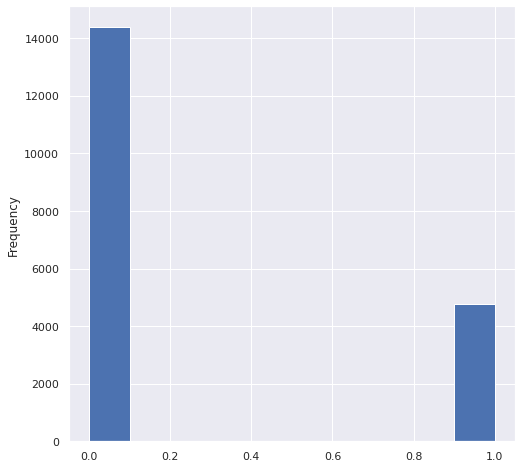

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:4018: RuntimeWarning: divide by zero encountered in log
  trm = _norm_pdf(a + b * np.log(x + np.sqrt(x2+1)))
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated func

count    19158.000000
mean         0.249348
std          0.432647
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: target, dtype: float64

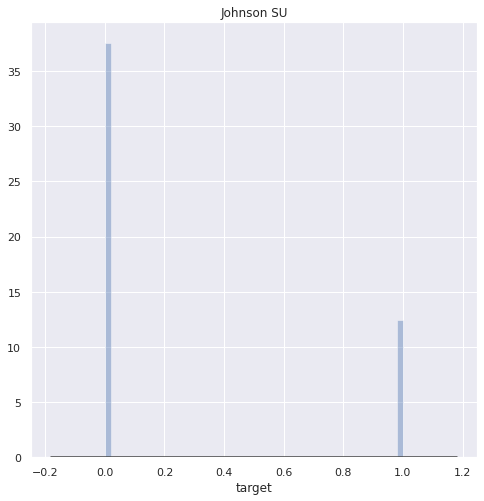

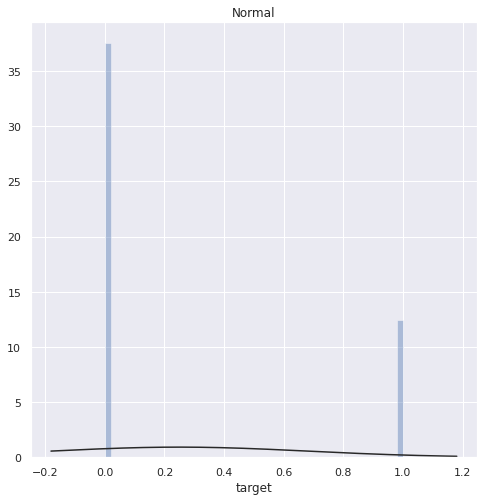

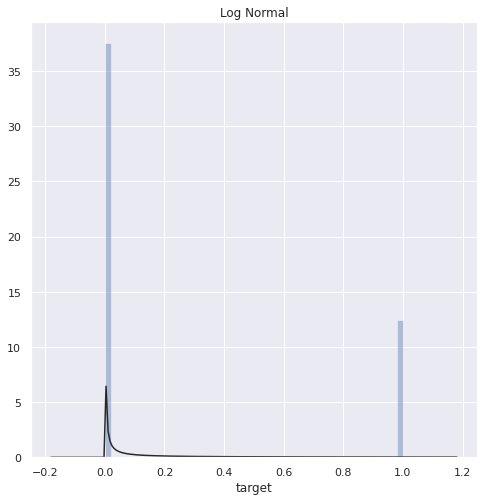

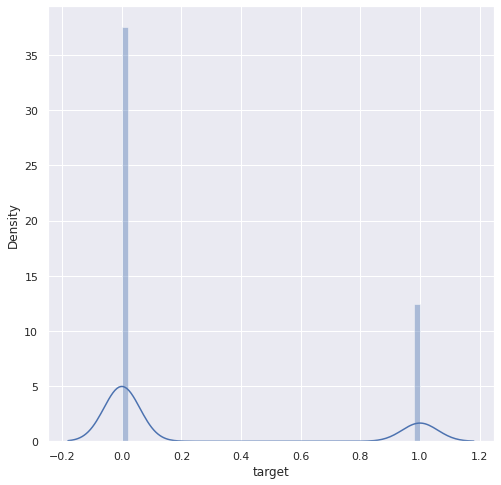

In [32]:
data["target"].astype(float).plot.hist()
plt.show()

y = data["target"]
plt.figure(1); plt.title("Johnson SU")
sns.distplot(y, kde= False, fit=st.johnsonsu)

plt.figure(2); plt.title("Normal")
sns.distplot(y, kde= False, fit=st.norm)

plt.figure(3); plt.title("Log Normal")
sns.distplot(y, kde= False, fit=st.lognorm)

plt.figure(4)
sns.distplot(y)
y.describe()

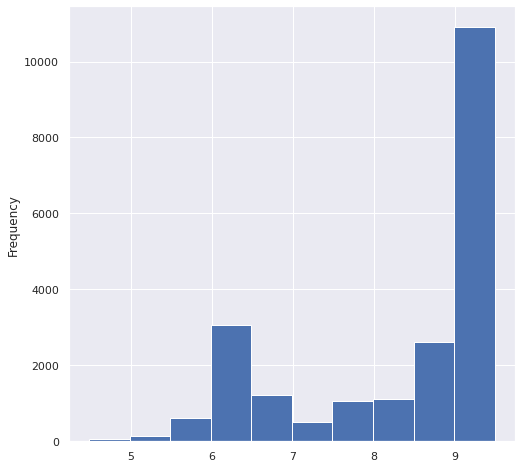

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:4018: RuntimeWarning: divide by zero encountered in log
  trm = _norm_pdf(a + b * np.log(x + np.sqrt(x2+1)))
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:1702: RuntimeWarning: divide by zero encountered in log
  return log(self._pdf(x, *args))
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for

count    21287.000000
mean         8.284615
std          1.235365
min          4.480000
25%          7.390000
50%          9.030000
75%          9.200000
max          9.490000
Name: city_development_matrics, dtype: float64


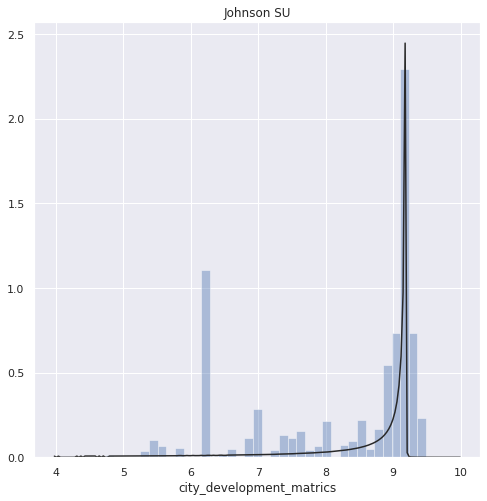

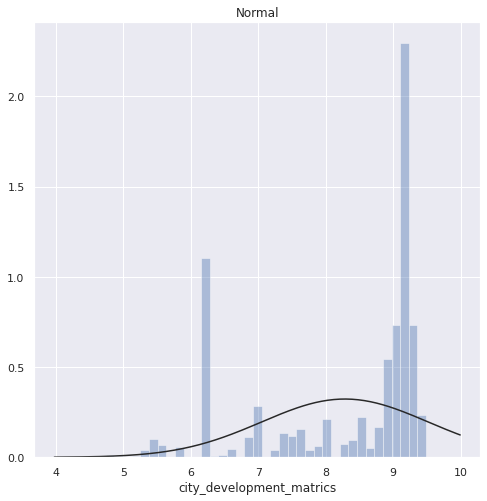

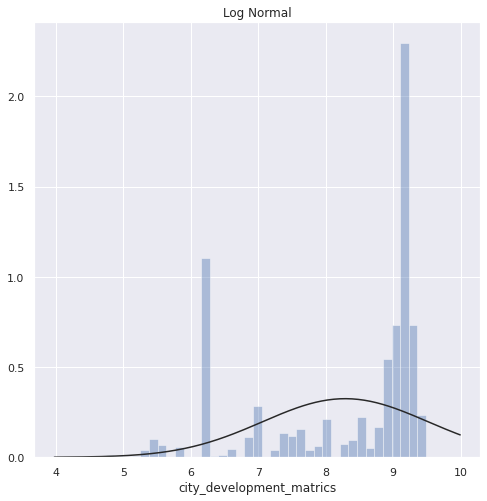

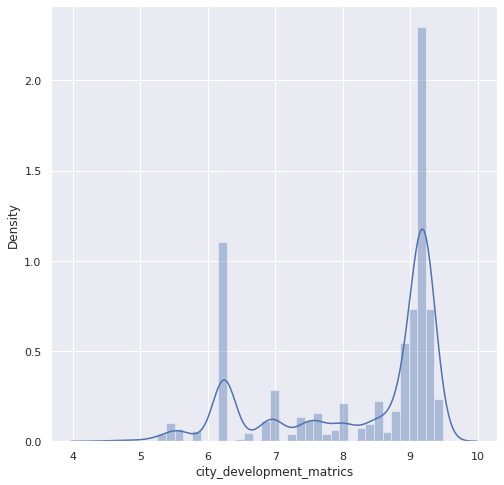

In [33]:
data["city_development_matrics"].astype(float).plot.hist()
plt.show()

y = data["city_development_matrics"]
plt.figure(1); plt.title("Johnson SU")
sns.distplot(y, kde= False, fit=st.johnsonsu)

plt.figure(2); plt.title("Normal")
sns.distplot(y, kde= False, fit=st.norm)

plt.figure(3); plt.title("Log Normal")
sns.distplot(y, kde= False, fit=st.lognorm)

plt.figure(4)
sns.distplot(y)
print(y.describe())

* Interpret any interesting information:
Drop Unnamed column since is just the index which will not help to understand the data.
Some of the graphs have a good fitting with the normal fit. 

10. Correlation
---

For the numerical attributes, use heatmap to show the correlation

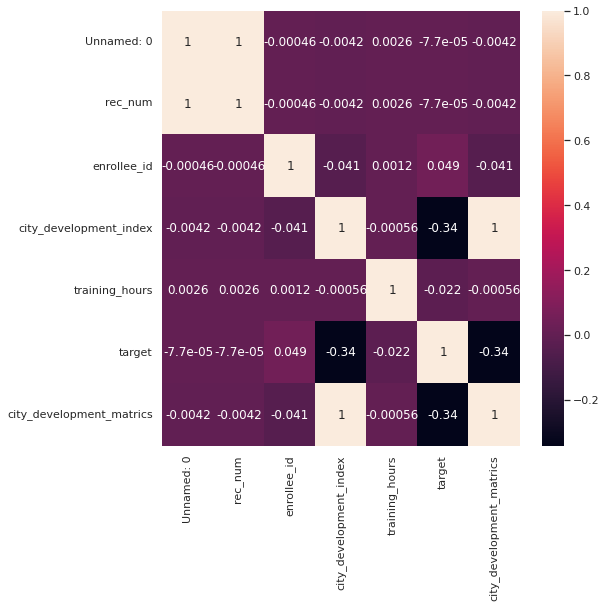

In [34]:
correlation = numerical_features.corr()
sns.heatmap(correlation, annot = True)

* If you find any interesting short list of columns, create another heatmap with them and show the correlations inside the heaptmap as well

Index(['training_hours', 'Unnamed: 0', 'rec_num', 'enrollee_id'], dtype='object')


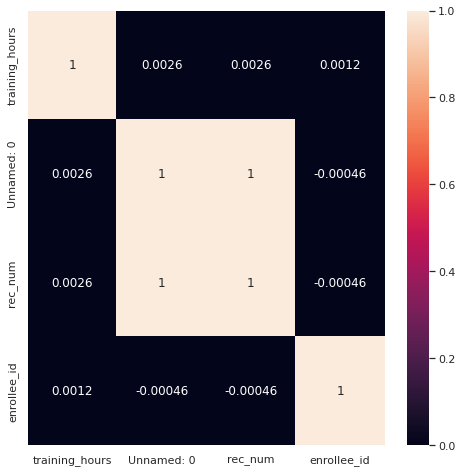

In [35]:
numColumns = 4
columns =correlation.nlargest(numColumns, "training_hours")["training_hours"].index 
print(columns)

c = np.corrcoef(data[columns].values.T)
sns.heatmap(c, annot = True, xticklabels=columns.values, yticklabels=columns.values)

* Show scatter plots between columns to show the relationships with the target

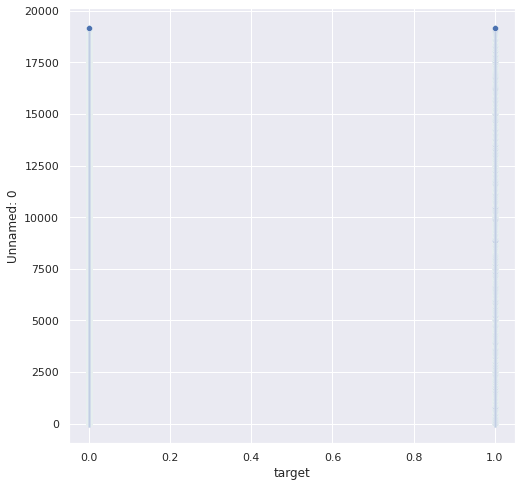

In [36]:
sns.scatterplot(y = "Unnamed: 0", x = "target", data = data)

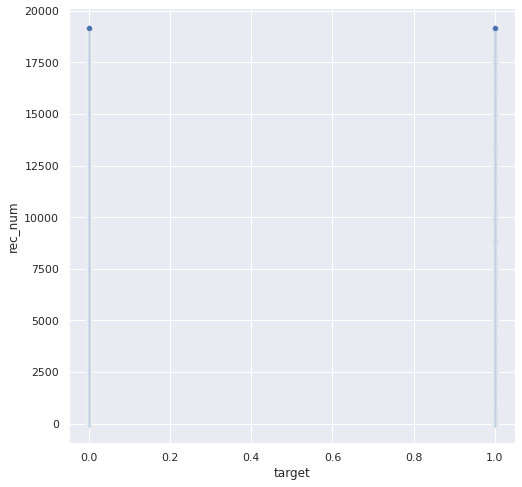

In [37]:
sns.scatterplot(y = "rec_num", x = "target", data = data)

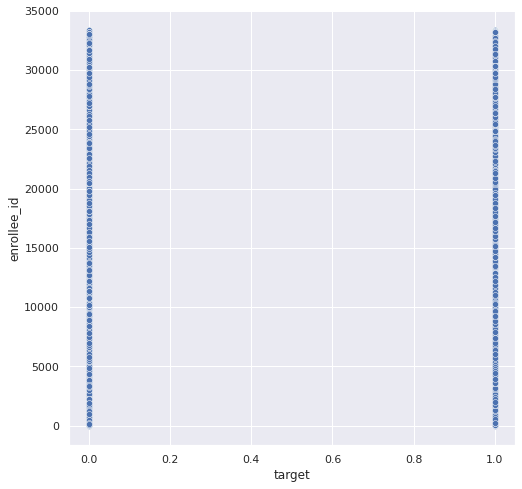

In [38]:
sns.scatterplot(y = "enrollee_id", x = "target", data = data)

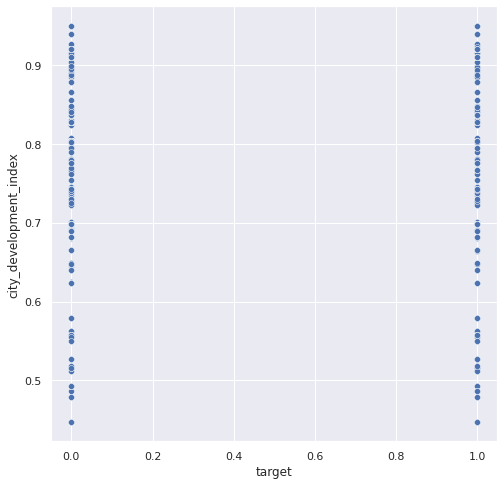

In [39]:
sns.scatterplot(y = "city_development_index", x = "target", data = data)

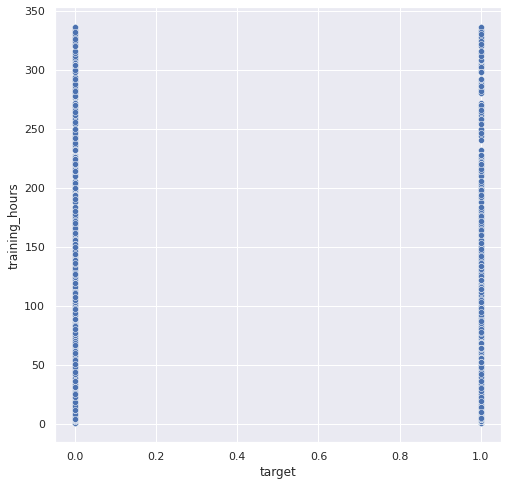

In [40]:
sns.scatterplot(y = "training_hours", x = "target", data = data)

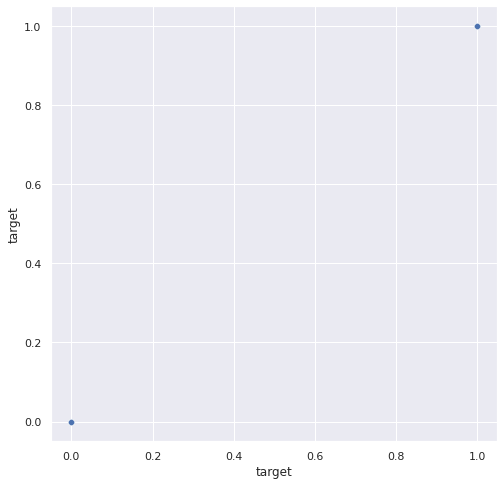

In [41]:
sns.scatterplot(y = "target", x = "target", data = data)

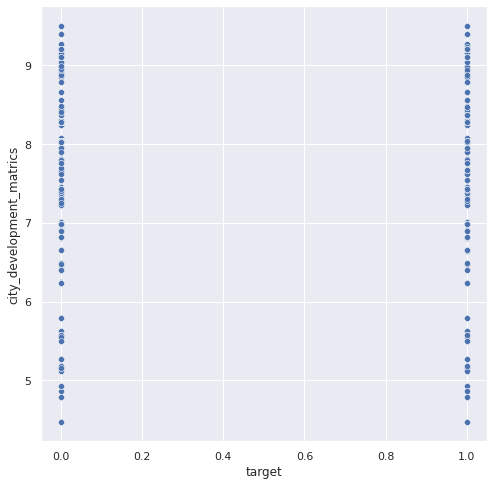

In [42]:
sns.scatterplot(y = "city_development_matrics", x = "target", data = data)

* Interpret and explain any finding and next course of action from there:



11. Outliers
---

* Use boxplot or any other strategies to find outliers

5321.5
15964.5
10643.0


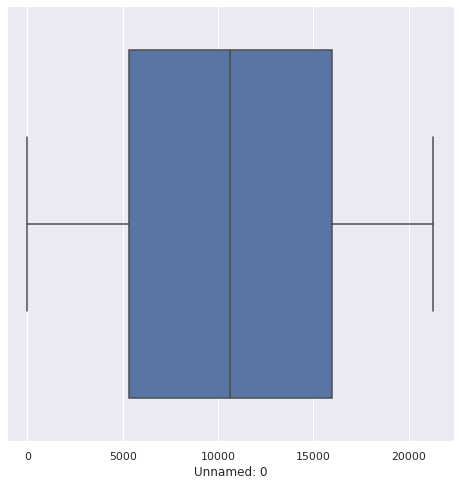

In [43]:
sns.boxplot(x = data["Unnamed: 0"])
first_quart = data['Unnamed: 0'].quantile(0.25)
third_quart = data['Unnamed: 0'].quantile(0.75)
IQR = third_quart - first_quart
print(first_quart)
print(third_quart)
print(IQR)

5322.5
15965.5
10643.0


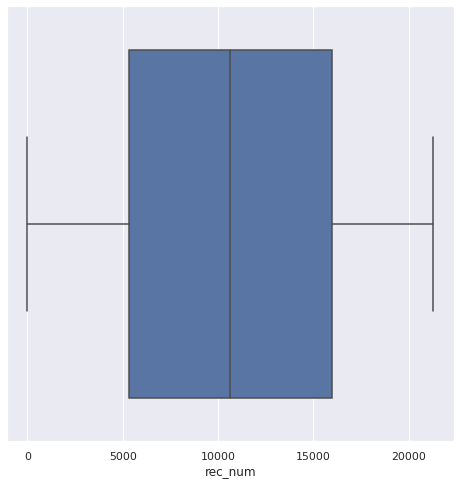

In [44]:
sns.boxplot(x = data["rec_num"])
first_quart = data['rec_num'].quantile(0.25)
third_quart = data['rec_num'].quantile(0.75)
IQR = third_quart - first_quart
print(first_quart)
print(third_quart)
print(IQR)

8554.5
25161.5
16607.0


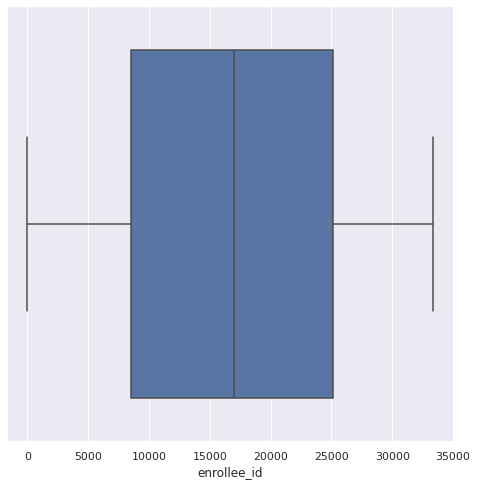

In [45]:
sns.boxplot(x = data["enrollee_id"])
first_quart = data['enrollee_id'].quantile(0.25)
third_quart = data['enrollee_id'].quantile(0.75)
IQR = third_quart - first_quart
print(first_quart)
print(third_quart)
print(IQR)

0.7390000000000001
0.92
0.18099999999999994


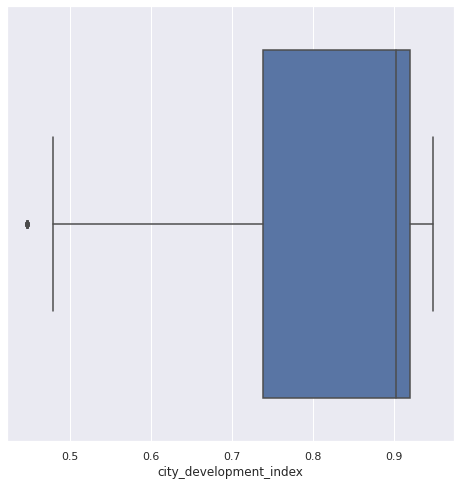

In [46]:
sns.boxplot(x = data["city_development_index"])
first_quart = data['city_development_index'].quantile(0.25)
third_quart = data['city_development_index'].quantile(0.75)
IQR = third_quart - first_quart
print(first_quart)
print(third_quart)
print(IQR)

23.0
88.0
65.0


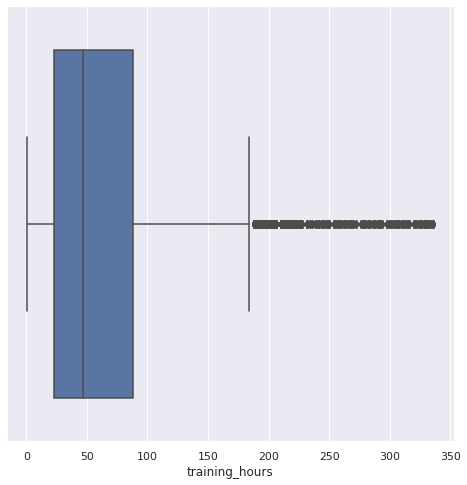

In [47]:
sns.boxplot(x = data["training_hours"])
first_quart = data['training_hours'].quantile(0.25)
third_quart = data['training_hours'].quantile(0.75)
IQR = third_quart - first_quart
print(first_quart)
print(third_quart)
print(IQR)

0.0
0.0
0.0


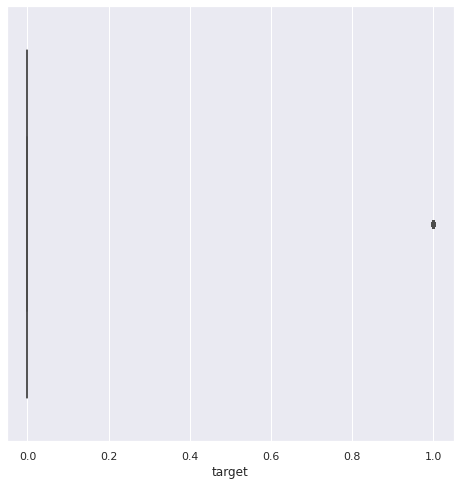

In [48]:
sns.boxplot(x = data["target"])
first_quart = data['target'].quantile(0.25)
third_quart = data['target'].quantile(0.75)
IQR = third_quart - first_quart
print(first_quart)
print(third_quart)
print(IQR)

7.390000000000001
9.2
1.8099999999999987


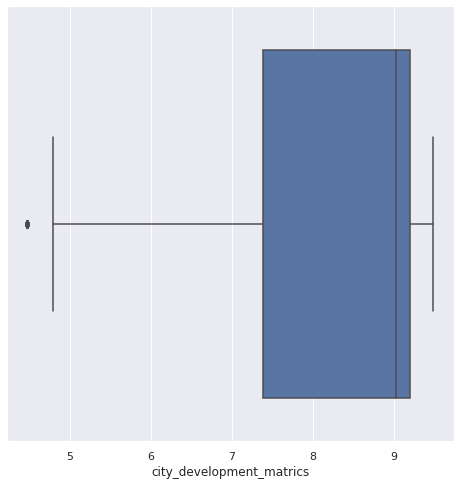

In [49]:
sns.boxplot(x = data["city_development_matrics"])
first_quart = data['city_development_matrics'].quantile(0.25)
third_quart = data['city_development_matrics'].quantile(0.75)
IQR = third_quart - first_quart
print(first_quart)
print(third_quart)
print(IQR)

* Interpret and explain any finding and next course of action from there.

Probably drop some features that are not usefull.

12. What are the different values of experience, can you categorize them in to 0, 1, and 2? 

The values of experience vary between <1 to 20>
---

In [50]:
one = (categorical_features["experience"].value_counts() == 0)
two = (categorical_features["experience"].value_counts() == 1 )
three = (categorical_features["experience"].value_counts() == 2 )

print(one)
print(two)
print(three)


>20    False
5      False
4      False
3      False
6      False
2      False
7      False
9      False
10     False
8      False
11     False
15     False
14     False
1      False
<1     False
16     False
12     False
13     False
17     False
19     False
18     False
20     False
Name: experience, dtype: bool
>20    False
5      False
4      False
3      False
6      False
2      False
7      False
9      False
10     False
8      False
11     False
15     False
14     False
1      False
<1     False
16     False
12     False
13     False
17     False
19     False
18     False
20     False
Name: experience, dtype: bool
>20    False
5      False
4      False
3      False
6      False
2      False
7      False
9      False
10     False
8      False
11     False
15     False
14     False
1      False
<1     False
16     False
12     False
13     False
17     False
19     False
18     False
20     False
Name: experience, dtype: bool


13. Summary and discussion: (15 pts)

Finally after all the above EDA, summarize your finding, next course of action such as we may need to transform distribution because of right skew etc, need to remove a particular columns for any reasons, remove records for any reasons, need to rebalance data and what are the rebalancing options (if needed), and any other finding.

We need to remove bad features that does not help analize the data like the first column which is an index column. Remove columns that is missing more than 20% of the data like company type and size. We also need to transform some of the distribution to a better graph fit. 